In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
from sklearn import linear_model

In [5]:
data = pd.read_csv('data_01_homeprices.csv')
data.head(n=5)

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [6]:
## Independent variable
area = data['area']

In [7]:
## Dependent variable
price = data['price']

Text(0.5,0,'Area (Sqr ft)')

Text(0,0.5,'Price (US$)')

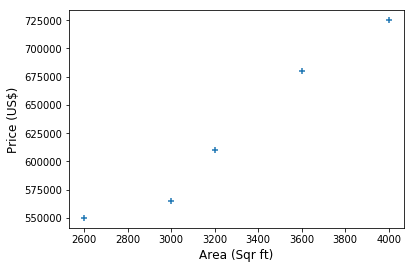

In [8]:
plt.scatter(area, price, marker='+')
plt.xlabel('Area (Sqr ft)', fontsize = 'large')
plt.ylabel('Price (US$)', fontsize = 'large')
plt.show()

In [9]:
model = linear_model.LinearRegression()
model.fit(data[['area']], data.price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
model.predict(np.array([[3300]]))

array([628715.75342466])

In [11]:
model.coef_

array([135.78767123])

Now we may use trained model to predict prices against area queries.

In [12]:
queries = pd.read_csv('data_02_areas.csv')
queries.head(n=3)

,area
0,1000
1,1500
2,2300


In [13]:
predicted_prices = model.predict(queries)
predicted_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [14]:
## Now we may put area queries and corresponding predicted prices into one DataFrame and export it to CSV file
queries['predicted_price'] = predicted_prices
queries.to_csv('data_03_prediction.csv', index=False)